<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Erick David Mendoza Gómez, César Sainz Nava.

**Fecha:** 05 de marzo del 2020.

**Expediente** : if713923 - if714982.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6 en parejas

In [3]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

## Ejercicio 1

### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1},\quad i=0,1,\cdots,n$$

>Sustituyendo $P_i$ en $P_{i+1}$

>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p}*[\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}]$$

>Simplificando

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}$$



## Ejercicio 2

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$

Es posible ver que ahi se encuentra $P(k, \lambda)$, entonces
$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

In [4]:
def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

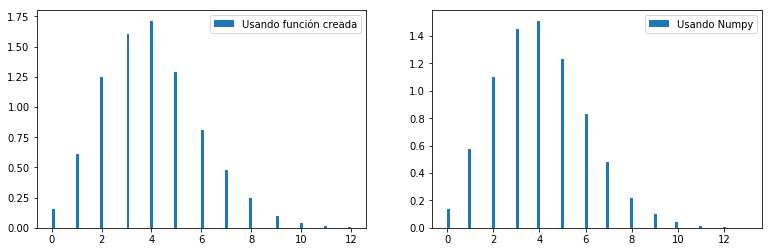

In [5]:
n = 12; l = 4; N = 10**4

p_acum = P_acum_Poisson_o(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_pois_numpy = np.random.poisson(l,N)
plt.hist(d_pois_numpy,100,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()



# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [6]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


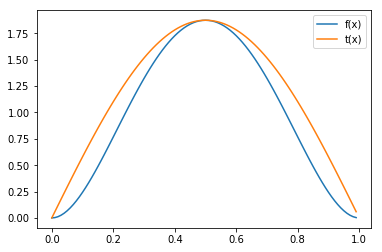

In [21]:
#1
# Con t(x) no constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*(np.sin(np.pi*x))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

### 2 y 3

Tenemos las 2 funciones con las que vamos a trabajar: $$f(x)=30(x^2-2x^3+x^4)$$  $$t(x) = a sin(\pi x)$$

Ahora hay que calcular $$x = g(x)$$  $$G(x) = \dfrac{\pi}{2}  \int \limits_{0}^{1}{\sin(\pi x)} dx $$  $$ U = \dfrac{-\cos(\pi x)}{2}+ \dfrac {1}{2}$$  Despejamos x que sería nuestra g(x):  $$ R2 = x = \dfrac{\cos^{-1}(-2U+1)}{\pi}$$

0.49992449967322145


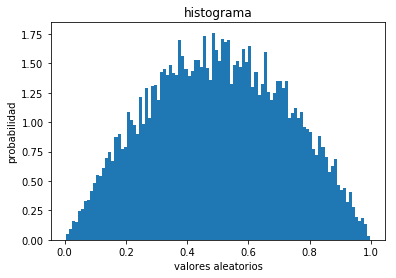

In [19]:
#4
N = 10000 # Número de muestras

g = lambda x:(np.pi*np.sin(np.pi*x))/2
x1 = np.arccos(-2*np.random.random(N)+1)/np.pi
# Histograma
plt.hist(x1,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma')
print(np.mean(x1))

plt.show()

El máximo de f es: [1.875]


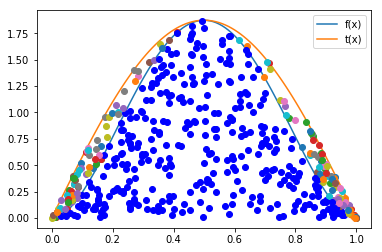

In [20]:
#5
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*(np.sin(np.pi*x))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

El máximo de f es: [1.875]


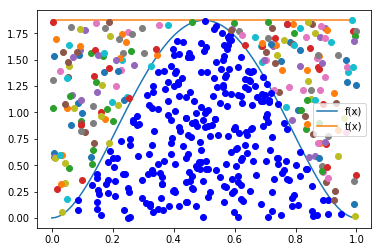

In [14]:
#6
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

El máximo de f es: [1.875]


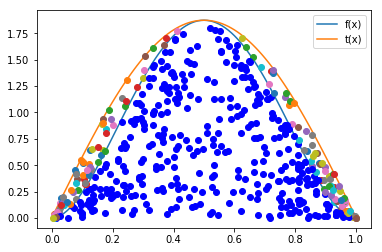

In [13]:
# Con t(x) no constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*(np.sin(np.pi*x))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

El máximo de f es: [2.109375]


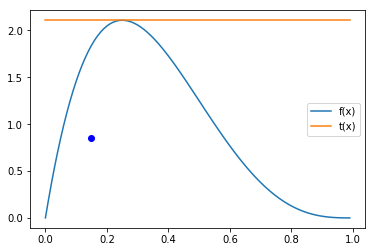

In [30]:
#7
# Función objetivo 
f = lambda x:(20*x)*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)